In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Funciones Globales y de errores

In [ ]:
def propagar_suma(x, y, delta_x, delta_y):
  z = x + y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]

def propagar_resta(x, y, delta_x, delta_y):
  z = x - y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]


def propagar_mult(x, y, delta_x, delta_y):
  z = x * y
  delta_z = (x * y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


def propagar_div(x, y, delta_x, delta_y):
  z = x / y
  delta_z = (x / y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


#En radianes
def propagar_cos(x, delta_x):
  z = np.cos(x)
  delta_z = delta_x * np.sin(x)

  return [z, delta_z]


#m es el exponente
def propagar_pot(x, delta_x, m):
  z = x ** m
  delta_z = x ** m * (m * delta_x / x)

  return [z, delta_z]

In [ ]:
def error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  error_nom = np.sqrt((error_apreciacion) ** 2 + (error_exactitud) ** 2 + (error_definicion) ** 2)
  error_abs = np.sqrt((error_nom) ** 2 + (error_estadistico) ** 2)

  return error_abs


#Aprepeciacion --> De ver maso la medicion
#Exactitud --> De la calibracion del instrumento
#Definicion --> De la forma del objeto a medir


def error_rel(x, delta_x):
  return delta_x/x


def analisis_error(x, error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  err_abs = error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion)
  err_rel = error_rel(x, err_abs)
  err_rel_por = err_rel * 100

  print([x, err_abs])
  print(f'El error absoluto es: {err_abs}')
  print(f'El error relativo es: {err_rel}')
  print(f'El error relativo porcentual es: {err_rel_por}')


def dif_sig(x, y, delta_x, delta_y):
  if np.abs(x - y) <= delta_x + delta_y:
    return 'No hay'
  else:
    return 'Si hay'


#Carga de Datos

Solo cambiar nombre archivo. En archivo radio, subir cualquiera de los archivos de radio de la misma muestra usados para browniano

In [ ]:
nombre_archivo = 'Latex_20_velocidad_1_0_ATRAPAMOS.txt'
datos_muestra = 'datos_browniano_Latex_20_browniano_1_0.txt'
archivo_radio = 'Radios_Prueba_3.0_0-Movimiento_Browniano.txt'

In [ ]:
data = pd.read_csv(nombre_archivo, delimiter = ';', skiprows = 2)
tabla_muestra = pd.read_csv(datos_muestra, delimiter = ',', index_col = 0)
data_radios = pd.read_csv(archivo_radio, delimiter = ';', skiprows = 2)

In [ ]:
tabla_muestra

,Valor,Error,Unidad
Variable,,,
Coeficiente de difusion(D),1.468751e-02,2.349801e-05,µm²/s
Viscocidad (eta),6.357921e-09,6.350712e-11,Pa·s
Deriva x,-1.812212e-03,8.305970e-04,µm/s
Deriva y,3.802842e-03,5.127223e-04,µm/s


In [ ]:
tabla_muestra.index


Index(['Coeficiente de difusion(D)', 'Viscocidad (eta)', 'Deriva x',
       'Deriva y'],
      dtype='object', name='Variable')

###Constantes Globales:

In [ ]:

D = tabla_muestra['Valor'].iloc[0]
D_error = tabla_muestra['Error'].iloc[0]
eta = tabla_muestra['Valor'].iloc[1]
eta_error = tabla_muestra['Error'].iloc[1]


##Funciones Utiles

In [ ]:
def corregir_valores(data):
  #Los valores obtenidos del tracker tienen notacion cientifica con E pero python la interpreta con e. La funcion cambia E por e
  for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.', regex=False)
    data[column] = pd.to_numeric(data[column], errors='coerce')

##Limpieza y Transfomacion

<p align="justify"> Debido a que los datos del Tracker estan dados en notacion cientifica pero utilizando E, fue necesario aplicar una funcion para transformarlas en e ya que es la manera en que python interpreta esta notacion. Por otra parte, las columnas estan numerados de manera que la primer particula no posee indice numerico pero las $N - 1$ restantes si, del estilo $variable.i$. Por lo tanto, se utilizo el numero $0$ para enumerar a las variables sin numeracion. Por ultimo, para la realizacion del grafico de trayectorias fue necesario normalizarlas de manera que todas comiencen en cero. Las mismas se encuentran en las columnas _norm. Se define la variable global numero de moleculas como n_moleculas.

In [ ]:

cols = data_radios.columns.tolist()

nuevas_cols = [col + '.0' if '.' not in col else col for col in cols]

cols_con_t = ['t'] + nuevas_cols[1:]

data_radios.columns = cols_con_t


In [ ]:
cols = data.columns.tolist()

cols = [col + '.0' if '.' not in col else col for col in cols]

cols_con_t = ['t'] + cols[1:]

data.columns = cols_con_t




---



IMPORTANTE: Numero de moleculas

In [ ]:
j = ''

for i in range(1, len(cols[-2])):
  j += cols[-2][-i]
  if cols[-2][-i] == '.':
    break

n_moleculas = 0

if len(j) > 2:
  n_moleculas = int(j[1::-1]) + 1
else:
  n_moleculas = int(j[0]) + 1

n_moleculas

5



---



In [ ]:
data.columns

Index(['t', 'x.0', 'y.0', 'x.1', 'y.1', 'x.2', 'y.2', 'x.3', 'y.3', 'x.4',
       'y.4', 'Unnamed: 11.0'],
      dtype='object')

In [ ]:
corregir_valores(data)
corregir_valores(data_radios)
data.tail()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,x.4,y.4,Unnamed: 11.0
174,11.59923,0.000132,0.000035,0.000133,0.00006,0.000144,0.000058,0.000104,0.000010,0.000105,0.000051,NaN
175,11.66589,0.000132,0.000035,0.000133,0.00006,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,NaN
176,11.73255,0.000132,0.000035,0.000133,0.00006,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,NaN
177,11.79921,0.000132,0.000035,0.000133,0.00006,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,NaN
178,11.86588,0.000132,0.000035,0.000134,0.00006,0.000145,0.000058,0.000105,0.000009,0.000106,0.000051,NaN


In [ ]:
data.ffill(inplace=True)
data.bfill(inplace=True)
data.fillna(0)

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,x.4,y.4,Unnamed: 11.0
0,0.000000,0.000065,0.000046,0.000033,0.000076,0.000043,0.000077,0.000004,0.000025,0.000006,0.000068,0.0
1,0.066662,0.000065,0.000046,0.000034,0.000076,0.000043,0.000077,0.000004,0.000025,0.000006,0.000068,0.0
2,0.133324,0.000065,0.000046,0.000034,0.000076,0.000043,0.000077,0.000005,0.000025,0.000006,0.000068,0.0
3,0.199987,0.000065,0.000046,0.000034,0.000076,0.000044,0.000077,0.000005,0.000025,0.000006,0.000068,0.0
4,0.266649,0.000065,0.000046,0.000034,0.000076,0.000044,0.000077,0.000005,0.000025,0.000007,0.000068,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,11.599230,0.000132,0.000035,0.000133,0.000060,0.000144,0.000058,0.000104,0.000010,0.000105,0.000051,0.0
175,11.665890,0.000132,0.000035,0.000133,0.000060,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,0.0
176,11.732550,0.000132,0.000035,0.000133,0.000060,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,0.0
177,11.799210,0.000132,0.000035,0.000133,0.000060,0.000145,0.000058,0.000104,0.000009,0.000106,0.000051,0.0


##Conversion de unidad

Los dataframes estan en $\mu m$

In [ ]:
multiplicador = 1e6

columnas_a_multiplicar = data.columns[1:]


data[columnas_a_multiplicar] = data[columnas_a_multiplicar] * multiplicador

In [ ]:
for i in range(0, n_moleculas):


  data[f'x.{i}_norm'] = (data[f'x.{i}'].values - data[f'x.{i}'][0])
  data[f'y.{i}_norm'] = (data[f'y.{i}'].values - data[f'y.{i}'][0])

In [ ]:
data.isna()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,x.4,...,x.0_norm,y.0_norm,x.1_norm,y.1_norm,x.2_norm,y.2_norm,x.3_norm,y.3_norm,x.4_norm,y.4_norm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.shape

(179, 22)

In [ ]:
len(data)

179

#Analisis


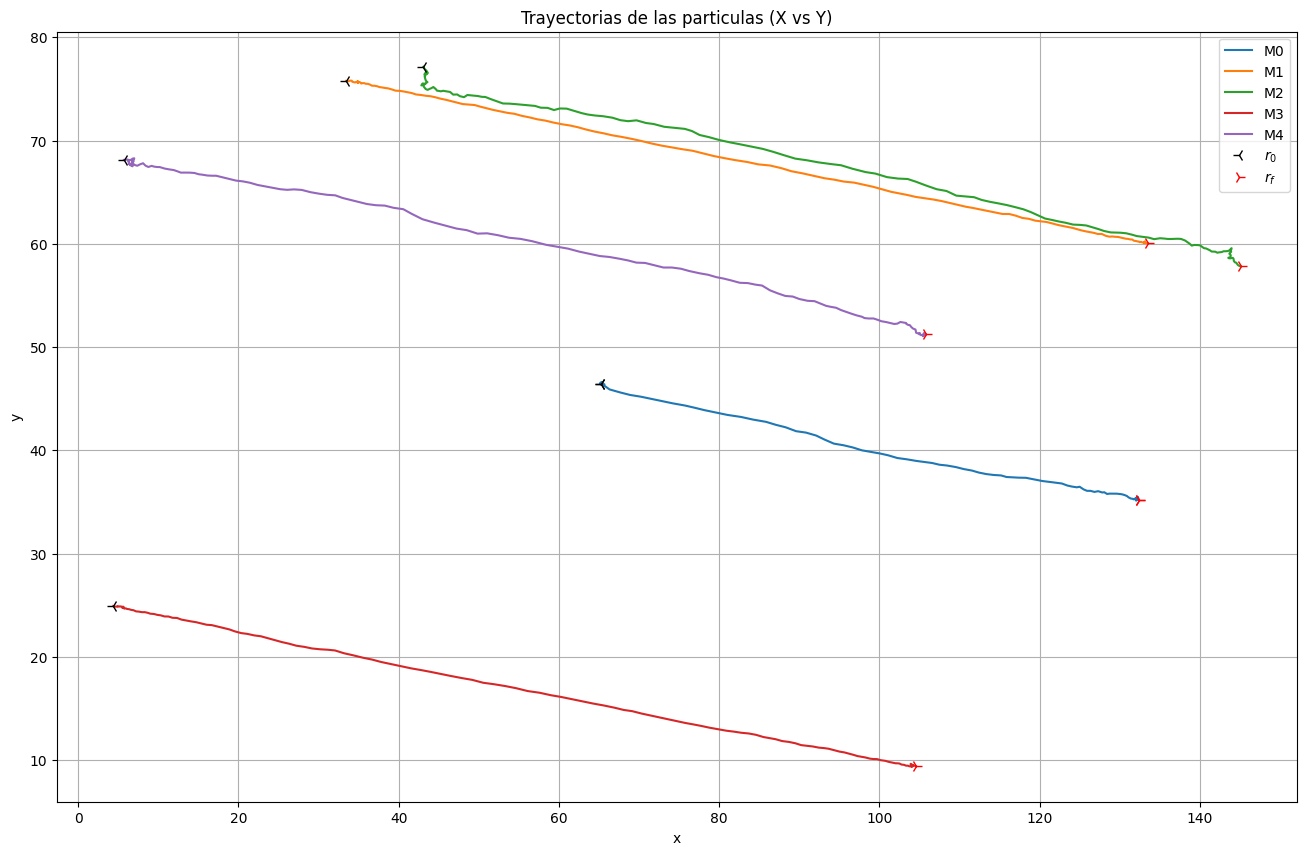

In [ ]:
#Visualizamos las trayectorias en un grafico espacial bidimensional
plt.figure(figsize=(16, 10))

for i in range(0, n_moleculas):

  plt.plot(data[f'x.{i}'], data[f'y.{i}'], label=f'M{i}')
  plt.plot(data[f'x.{i}'][0], data[f'y.{i}'][0], 'k3', markersize = 9)
  plt.plot(data[f'x.{i}'].tail(1), data[f'y.{i}'].tail(1), 'r4', markersize = 9)


plt.plot(data[f'x.0'][0], data[f'y.0'][0], 'k3', markersize = 9, label = '$r_0$')
plt.plot(data[f'x.0'].tail(1), data[f'y.0'].tail(1), 'r4', markersize = 9, label = '$r_f$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de las particulas (X vs Y)')
plt.legend()
plt.grid(True)
plt.show()

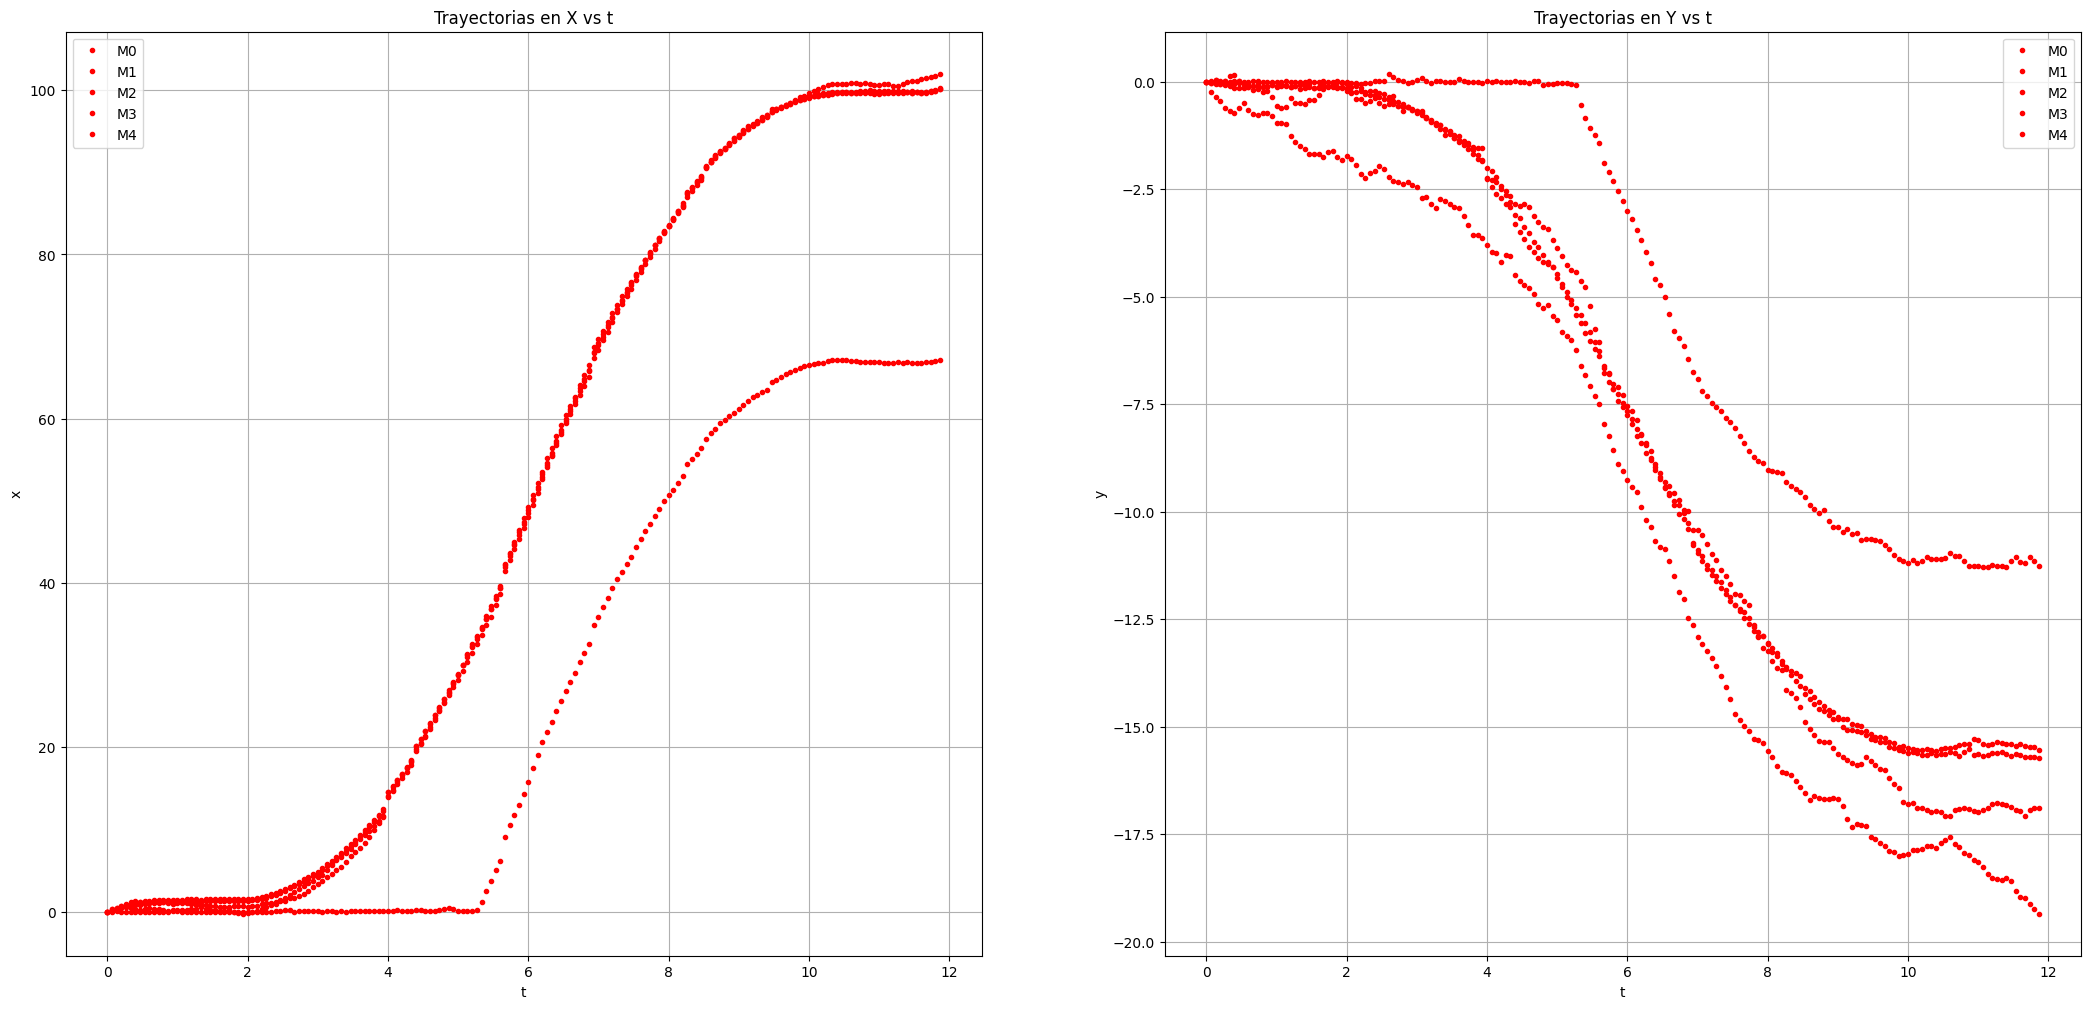

In [ ]:
#Graficamos la evolucion temporal de cada particula con mismo origen para observar la desviacion de cada una

fig, ax = plt.subplots(1, 2, figsize=(26, 12))

for i in range(0, n_moleculas):
  ax[0].plot(data['t'], data[f'x.{i}_norm'], '.r',label=f'M{i}')
  ax[1].plot(data['t'], data[f'y.{i}_norm'], '.r',label=f'M{i}')

ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].set_title('Trayectorias en X vs t')
ax[0].legend()
ax[0].grid(True)
ax[1].set_ylabel('y')
ax[1].set_xlabel('t')
ax[1].set_title('Trayectorias en Y vs t')
ax[1].legend()
ax[1].grid(True)


plt.show()

#Velocidad Maxima

La idea es que al ser solidaria al sistema de referencia, la particula en movimiento no sirve como parametro de velocidad maxima. Por lo tanto, utilizamos n particulas de alrededor para comparar la velocidad relativa con la particula atrapada al momento de soltarse.

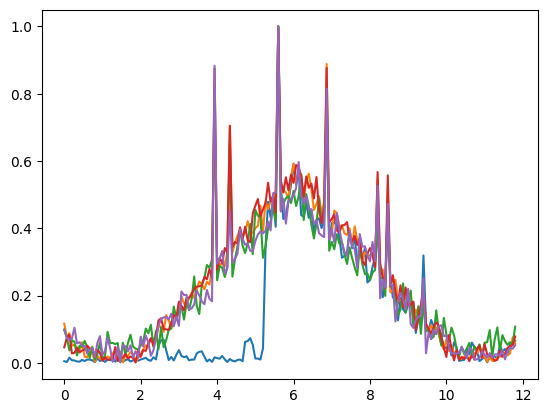

In [ ]:
#Creo un DataFrame con las velocidades de las particulas

vels = pd.DataFrame()
vels['t'] = data['t'][:-1]
for i in range(0, n_moleculas):
  vels[f'v.{i}'] = np.sqrt(np.diff(data[f'x.{i}']) ** 2 + np.diff(data[f'y.{i}']) ** 2)
  plt.plot(vels['t'], vels[f'v.{i}']/vels[f'v.{i}'].max(), label=f'M{i}')

plt.show()

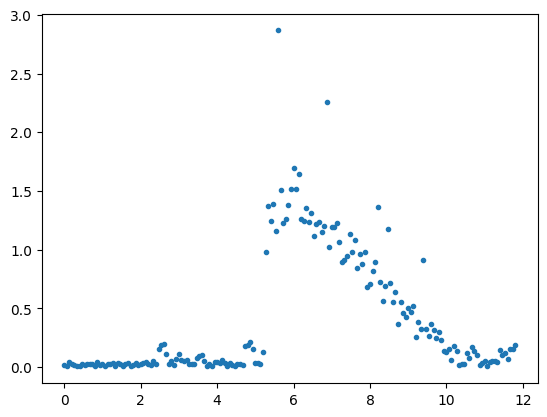

In [ ]:
plt.plot(vels['t'], vels['v.0'], '.')

In [ ]:
#Normalizando por el valor maximo se observa que 0.25 es un buen estimador
max_vel_index = vels[vels['v.0']/vels['v.0'].max() > 0.25].index[0]

In [ ]:
vels.iloc[max_vel_index].drop('t')

,79
v.0,0.980918
v.1,1.248341
v.2,1.022957
v.3,1.217379
v.4,1.128937


In [ ]:
max_vel = vels.iloc[max_vel_index].drop('t').median()
max_vel_error = vels.iloc[max_vel_index].drop('t').std()

In [ ]:
max_vel

1.1289365056104772

In [ ]:
print(f'La velocidad maxima es: {max_vel}')

La velocidad maxima es: 1.1289365056104772


#Fuerza Maxima

In [ ]:
def F_max(eta, eta_error, v_max, v_max_error, radio_part):
  res= np.array(propagar_mult(eta, v_max, eta_error, v_max_error))

  return 6 * np.pi * res * radio_part

In [ ]:
data_radios.drop('t', axis=1, inplace=True)

In [ ]:
radio_particula = data_radios.sum().mean()

In [ ]:
fuerza_max = F_max(eta, eta_error, max_vel, max_vel_error, radio_particula)

fuerza_max

array([2.44783814e-10, 2.54951921e-11])

#Exportar Datos

In [ ]:
datos_exportar_dic = {
    'Variable': ['Fuerza Maxima (F)', 'Velocidad Maxima (V)'],
    'Valor': [fuerza_max[0], max_vel],
    'Error': [fuerza_max[1], max_vel_error],
    'Unidad': ['nan', 'µm/s']
}

datos_exportar = pd.DataFrame(datos_exportar_dic)
datos_exportar.to_csv(f'datos_fuerza_{nombre_archivo}', index=False)

#Datos y graficos utilizados en el Informe

In [ ]:
viscosidades = [2.528, 5.222, 6.357, 1.812]
viscosidades_error = [0.023, 0.053, 0.063, 0.01]
fuerzas = [8.140904243375251e-11, 1.5271099753567504e-10, 2.447838139519493e-10, 8.718767837804332e-11]
fuerzas_error = [1.3049137936113579e-11, 6.884550730551732e-12, 8.5495192138320986e-12, 1.0397034131590914e-11]

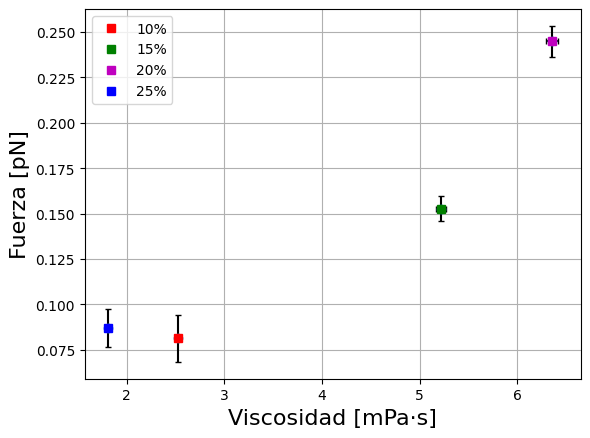

In [ ]:
plt.errorbar(viscosidades, np.array(fuerzas) * 1e9, xerr=viscosidades_error, yerr=np.array(fuerzas_error) * 1e9, fmt='o', capsize = 2, ecolor = '#000')
plt.plot(viscosidades[0], np.array(fuerzas)[0] * 1e9, 'rs', label = '10%', zorder = 10)
plt.plot(viscosidades[1], np.array(fuerzas)[1] * 1e9, 'gs', label = '15%', zorder = 10)
plt.plot(viscosidades[2], np.array(fuerzas)[2] * 1e9, 'ms', label = '20%', zorder = 10)
plt.plot(viscosidades[3], np.array(fuerzas)[3] * 1e9, 'bs', label = '25%', zorder = 10)
plt.legend()
plt.ylabel('Fuerza [pN]', fontsize = 16)
plt.xlabel('Viscosidad [mPa·s]', fontsize = 16)


plt.grid()

plt.legend()
plt.savefig('FuerzavsViscosidad.png')

plt.show()